In [1]:
import pandas as pd
df_model = pd.read_csv('../data/negativeTweets.csv')

In [2]:
df_model_old = df_model.loc[df_model['Datetime'] >= '2021-11-08']

In [3]:
df_model_old = df_model.loc[df_model['Datetime'] <= '2021-11-12']

In [4]:
import pandas as pd
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
%matplotlib inline
punc = ['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}',"%"]
stop_words = text.ENGLISH_STOP_WORDS.union(punc)
desc = df_model_old.Text.values
vectorizer = TfidfVectorizer(stop_words = stop_words,max_features = 1000)
X = vectorizer.fit_transform(desc)
words = vectorizer.get_feature_names()

In [5]:
df_model = pd.DataFrame(X.toarray(),columns=words)

In [8]:
len(df_model.columns)

1000

In [6]:
from sklearn.decomposition import PCA
import seaborn as sns

def show_clusters_size(clusters):
    unique, counts = np.unique(clusters, return_counts=True)
    print(dict(zip(unique, counts)))

# DBSCAN

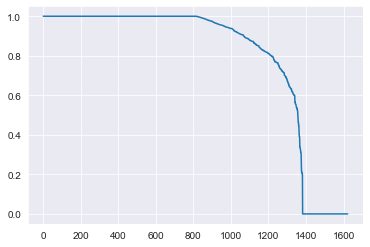

In [10]:
# k-dist function with MinPts = 2 * dimensions
from matplotlib import pyplot as plt
import numpy as np
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=200)
neighbors_fit = neighbors.fit(df_model)
distances, indices = neighbors_fit.kneighbors(df_model)
distances = np.sort(distances, axis=0)[::-1]
distances = distances[:,1]
plt.plot(distances)

In [35]:
# Parameters chosen using k-dist heuristic
eps = 1
minPts = 70

In [36]:
import time
from sklearn.cluster import DBSCAN

t0 = time.time()
dbscan = DBSCAN(eps=eps, min_samples=minPts).fit(df_model)
t_dbscan = time.time() - t0
print("DBSCAN required", t_dbscan, "seconds")
predictions = dbscan.fit_predict(df_model)
Clusters = predictions

DBSCAN required 0.1949138641357422 seconds


In [37]:
show_clusters_size(Clusters)

{-1: 296, 0: 1327}


In [40]:
# Testing different parameters
# Test 1
eps = 0.8
minPts = 120
dbscan = DBSCAN(eps=eps, min_samples=minPts).fit(df_model)
predictions = dbscan.fit_predict(df_model)
Clusters = predictions
show_clusters_size(Clusters)

KeyboardInterrupt: 

In [10]:
predictions

array([-1, -1, -1, ..., -1, -1, -1])

In [69]:
df_model_old['Class'] = predictions

In [70]:
df_model_old.to_csv("DBSCAN062022_0.6200.csv",index=False)